<a href="https://colab.research.google.com/github/julianguerra1231186-crypto/AI-julianguerra/blob/main/ModeloDePrediccionSaludMental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Inteligencia Artificial – Ingeniería de Sistemas (CORHUILA)
###Docente: José Miguel Llanos Mosquera
###Semestre: 2025-2
###Objetivo: Determinar si una persona es propensa a recibir tratamiento de salud mental, considerando diferentes características personales, sociales y emocionales.
###es es un modelo de clasificacion binaria , donde se predice la salud mentalde una persona
###Fecha de sustentación: 18 de noviembre de 2025
###Estudiante : JulianGuerra
###Informacion de la data: 261,328 rows × 17 columns

###Paso 1 . Cargamos las librerias

In [1]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Libreria para el preprocesamiento de los datos
from sklearn import preprocessing
# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder
# libreria para árboles de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#libreria para SVM
from sklearn.svm import SVC
# Libreria para separar los datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Libreria para las métricas
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Libreria para el modelo de clasificación Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Balanceo de clases
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV



# Ignirar Warning
import warnings
warnings.simplefilter('ignore')

###Paso 2 . Cargamos la data

In [3]:
# Se cargan los datos de entrada
data = pd.read_csv("Mentaldataset1.csv", sep=",")

data.head()

,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions
0,Female,UK,Others,No,Yes,No,15-30 days,No,Yes,Yes,High,No,Yes,Maybe,No,No,No
1,Female,USA,Housewife,No,Yes,No,15-30 days,Maybe,Maybe,Yes,High,Maybe,Yes,Maybe,Maybe,No,Not sure
2,Female,Canada,Others,No,No,Yes,More than 2 months,Maybe,No,No,Medium,No,No,No,No,No,Not sure
3,Female,Canada,Corporate,No,Yes,Yes,Go out Every day,No,Maybe,No,Medium,No,No,Maybe,No,No,Not sure
4,Female,UK,Corporate,No,No,Yes,More than 2 months,Yes,No,Maybe,Medium,Maybe,No,Maybe,Maybe,No,Not sure


###Paso 3 . Realizamos la exploracion de los datos

In [4]:
# Información general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261328 entries, 0 to 261327
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Gender                 261328 non-null  object
 1   Country                261328 non-null  object
 2   Occupation             261328 non-null  object
 3   SelfEmployed           256972 non-null  object
 4   FamilyHistory          261328 non-null  object
 5   Treatment              261328 non-null  object
 6   DaysIndoors            261328 non-null  object
 7   HabitsChange           261328 non-null  object
 8   MentalHealthHistory    261328 non-null  object
 9   IncreasingStress       261328 non-null  object
 10  MoodSwings             261328 non-null  object
 11  SocialWeakness         261328 non-null  object
 12  CopingStruggles        261328 non-null  object
 13  WorkInterest           261328 non-null  object
 14  SocialWeakness.1       261328 non-null  object
 15  

In [5]:
# Estadísticas descriptivas
data.describe()

,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions
count,261328,261328,261328,256972,261328,261328,261328,261328,261328,261328,261328,261328,261328,261328,261328,261328,261328
unique,2,35,5,2,2,2,5,3,3,3,3,3,2,3,3,3,3
top,Male,USA,Housewife,No,No,No,1-14 days,Yes,No,Maybe,Medium,Maybe,No,No,Maybe,No,No
freq,230614,154478,60081,230404,161981,132958,57598,97687,94027,90697,90215,93271,139251,94460,93271,205477,108972


###Paso 4 . Preposamiento de los datos

In [7]:
# Se observa si existen registros con NaN
print("Columna           NaN")
print(data.isnull().sum(axis=0))
# y se eliminan
data = data.dropna()

Columna           NaN
Gender                   0
Country                  0
Occupation               0
SelfEmployed             0
FamilyHistory            0
Treatment                0
DaysIndoors              0
HabitsChange             0
MentalHealthHistory      0
IncreasingStress         0
MoodSwings               0
SocialWeakness           0
CopingStruggles          0
WorkInterest             0
SocialWeakness.1         0
MentalHealthInterview    0
CareOptions              0
dtype: int64


###Paso 5 . Se cambian las cadenas a valores numéricos

In [ ]:
# trasformar varias cadena a numerico
le = LabelEncoder()
data['Treatment'] = le.fit_transform(data['Treatment'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Country'] = le.fit_transform(data['Country'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['SelfEmployed'] = le.fit_transform(data['SelfEmployed'])
data['FamilyHistory'] = le.fit_transform(data['FamilyHistory'])
data['DaysIndoors'] = le.fit_transform(data['DaysIndoors'])
data['HabitsChange'] = le.fit_transform(data['HabitsChange'])
data['MentalHealthHistory'] = le.fit_transform(data['MentalHealthHistory'])
data['IncreasingStress'] = le.fit_transform(data['IncreasingStress'])
data['MoodSwings'] = le.fit_transform(data['MoodSwings'])
data['SocialWeakness'] = le.fit_transform(data['SocialWeakness'])
data['CopingStruggles'] = le.fit_transform(data['CopingStruggles'])
data['WorkInterest'] = le.fit_transform(data['WorkInterest'])
data['SocialWeakness.1'] = le.fit_transform(data['SocialWeakness.1'])
data['MentalHealthInterview'] = le.fit_transform(data['MentalHealthInterview'])
data['CareOptions'] = le.fit_transform(data['CareOptions'])

data

,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions
0,0,33,3,0,1,0,1,1,2,2,0,1,1,0,1,1,0
1,0,34,2,0,1,0,1,0,0,2,0,0,1,0,0,1,1
2,0,4,3,0,0,1,4,0,1,1,2,1,0,1,1,1,1
3,0,4,1,0,1,1,3,1,0,1,2,1,0,0,1,1,1
4,0,33,1,0,0,1,4,2,1,0,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261323,1,34,0,0,0,0,1,0,1,1,1,0,1,1,0,0,1
261324,1,34,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1
261325,1,34,0,0,1,0,1,0,1,1,1,0,1,1,0,1,0
261326,1,34,0,0,1,1,1,0,1,1,1,0,1,1,0,1,2


###Paso 6 .  Histograma


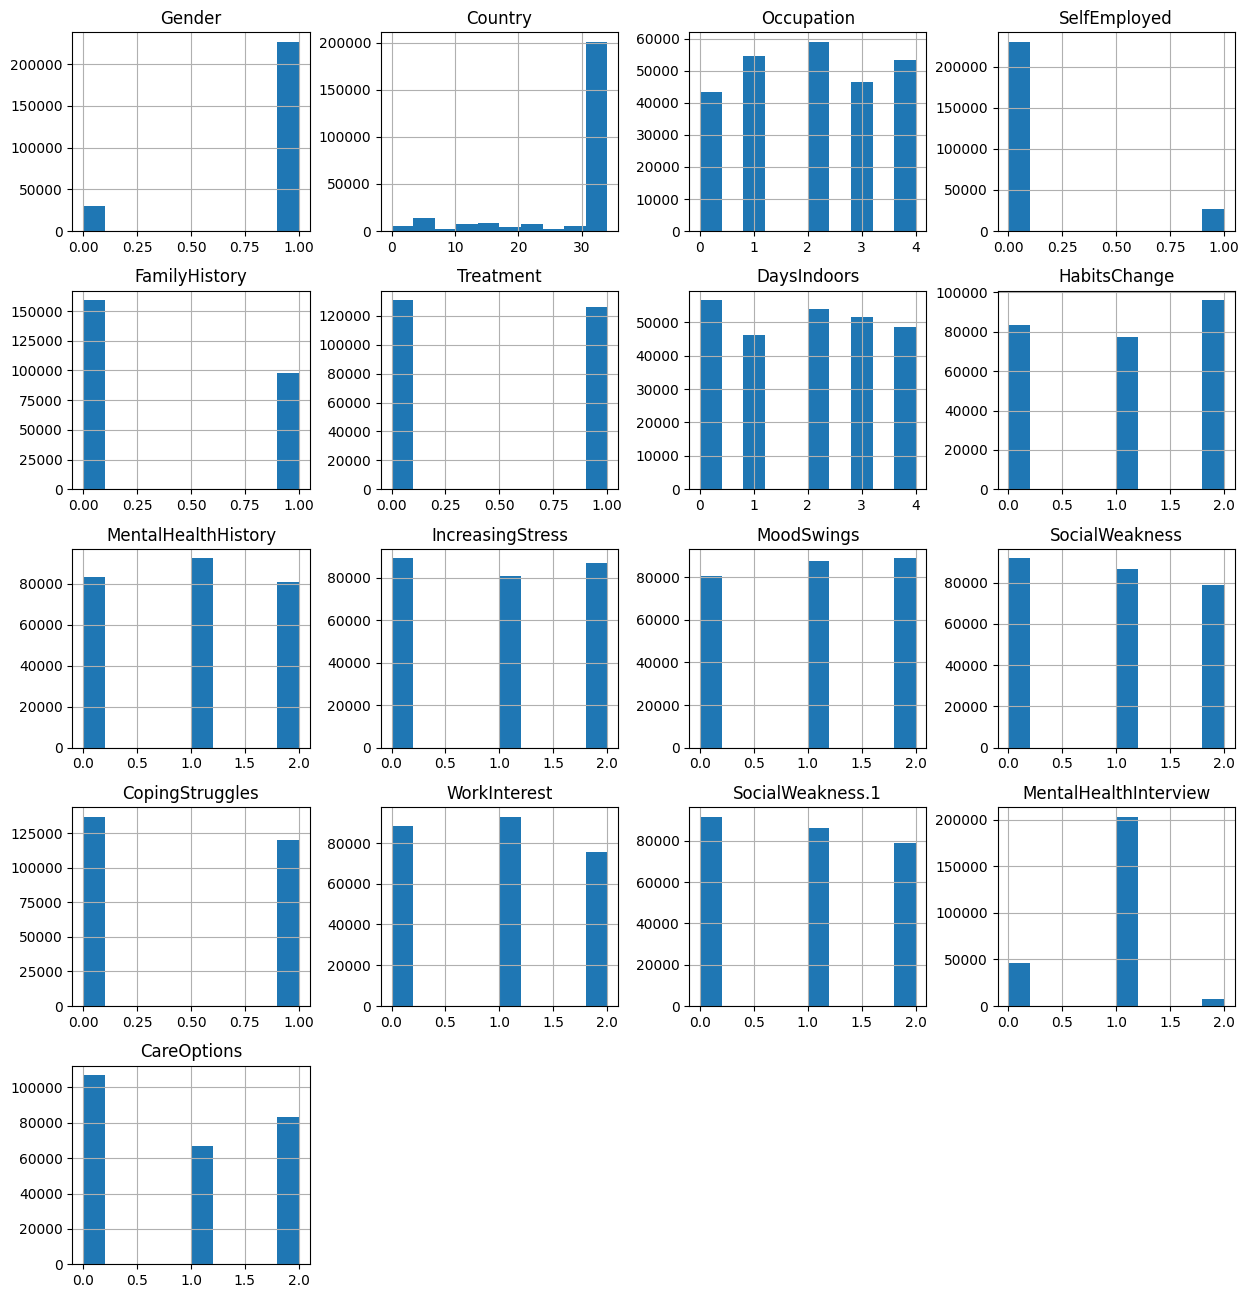

In [ ]:
# Se genera el histograma de los datos
hist = data
hist.hist()
plt.rcParams['figure.figsize'] = (15, 16)
plt.show()

In [ ]:
# Se consulta la cantidad de registros
data.groupby('Treatment').size()

,0
Treatment,
0,130882
1,126090


In [ ]:
###Se Observa que la data esta totalmente desbalanzeada

###Paso 7 . Se realiza el balanceo de los datos

In [ ]:
# Se realiza el resample

df_no = data[data['Treatment'] == 0]
df_yes = data[data['Treatment'] == 1]
# Muestreo para balancear
data_oversample = resample(
    df_yes,
    replace=True,
    n_samples=130882,
    random_state=1
)

# Unimos los datos balanceados
data_balance = pd.concat([df_no, data_oversample])
data_balance['Treatment'].value_counts()

,count
Treatment,
0,130882
1,130882


In [ ]:
# Se genera las estadísticas del DataFrame
data_balance.describe()

,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions
count,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000,261764.000000
mean,0.882906,29.270026,2.045484,0.104124,0.385267,0.500000,1.955945,1.050301,0.992295,0.991401,1.032533,0.950921,0.467123,0.949156,0.950921,0.848593,0.911783
std,0.321533,9.441410,1.375257,0.305422,0.486659,0.500001,1.419676,0.834174,0.800003,0.827915,0.811052,0.813130,0.498919,0.797738,0.813130,0.430889,0.856316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,33.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,34.000000,2.000000,0.000000,0.000000,0.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,34.000000,3.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,34.000000,4.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000


<Axes: >

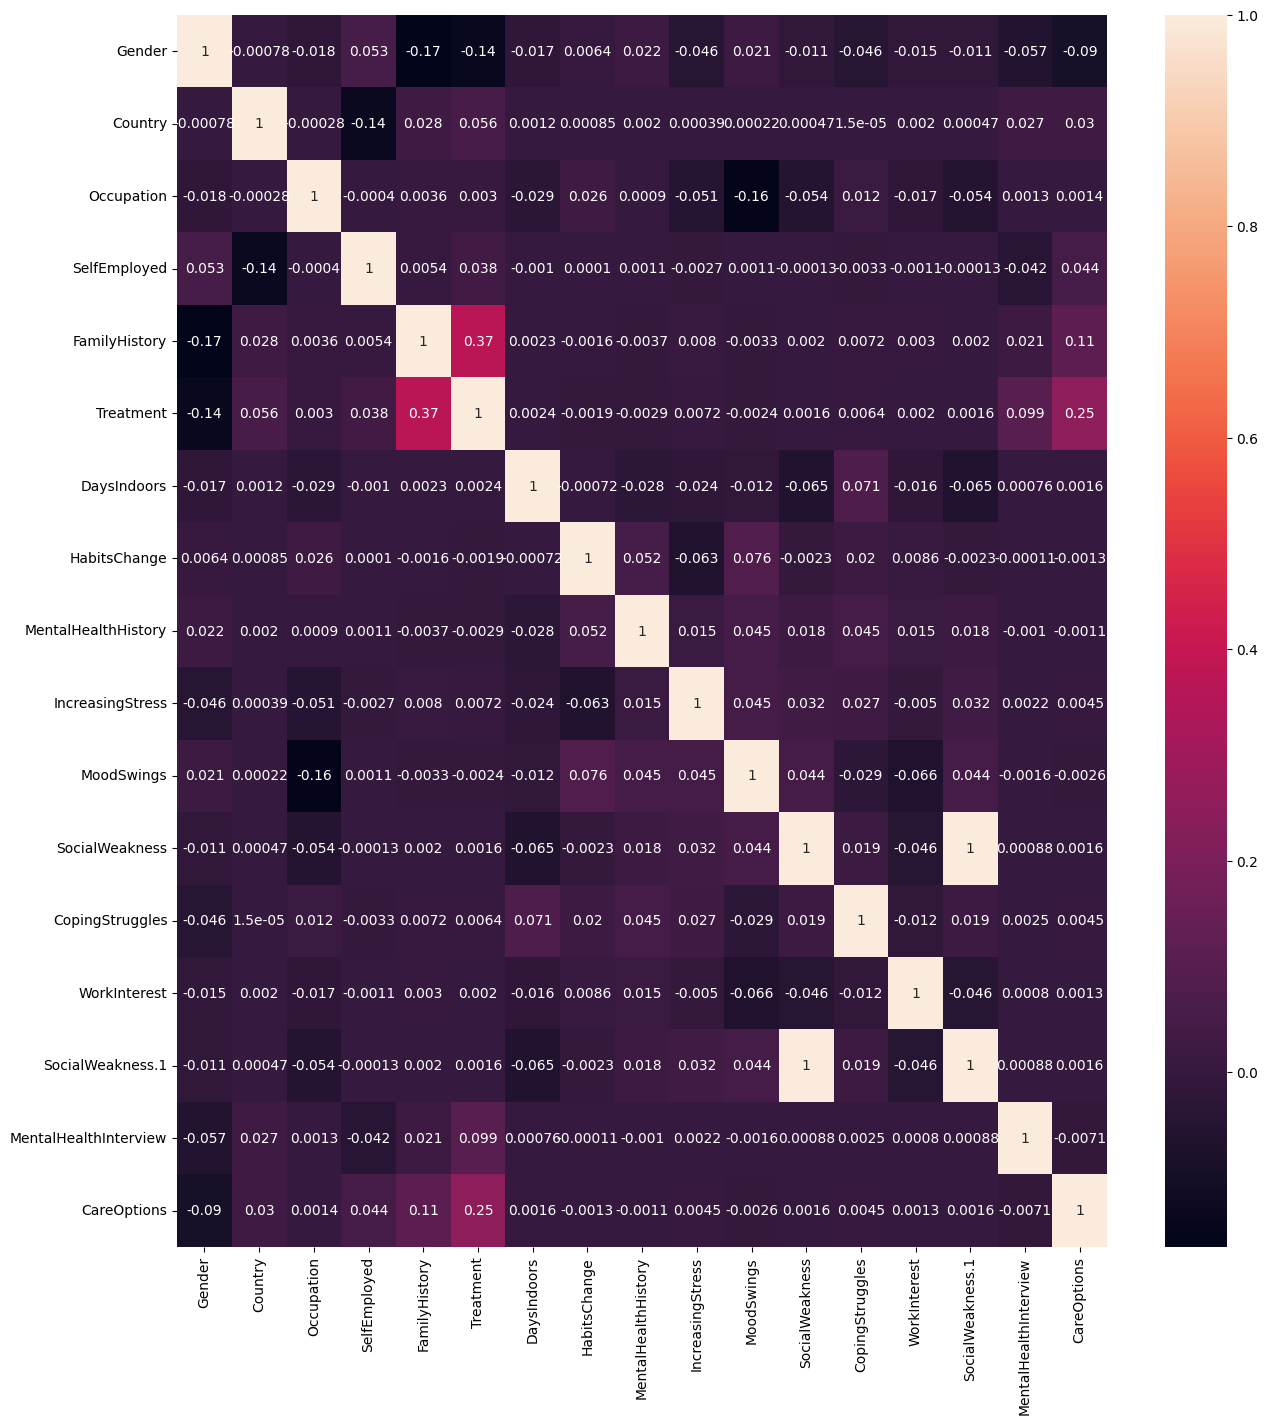

In [ ]:
### Matriz correlación de variables (pearson)
matriz_pearson = data.corr(method='pearson')

### Gráfica de las correlaciones
sb.heatmap(matriz_pearson,
           annot=True)

<Axes: >

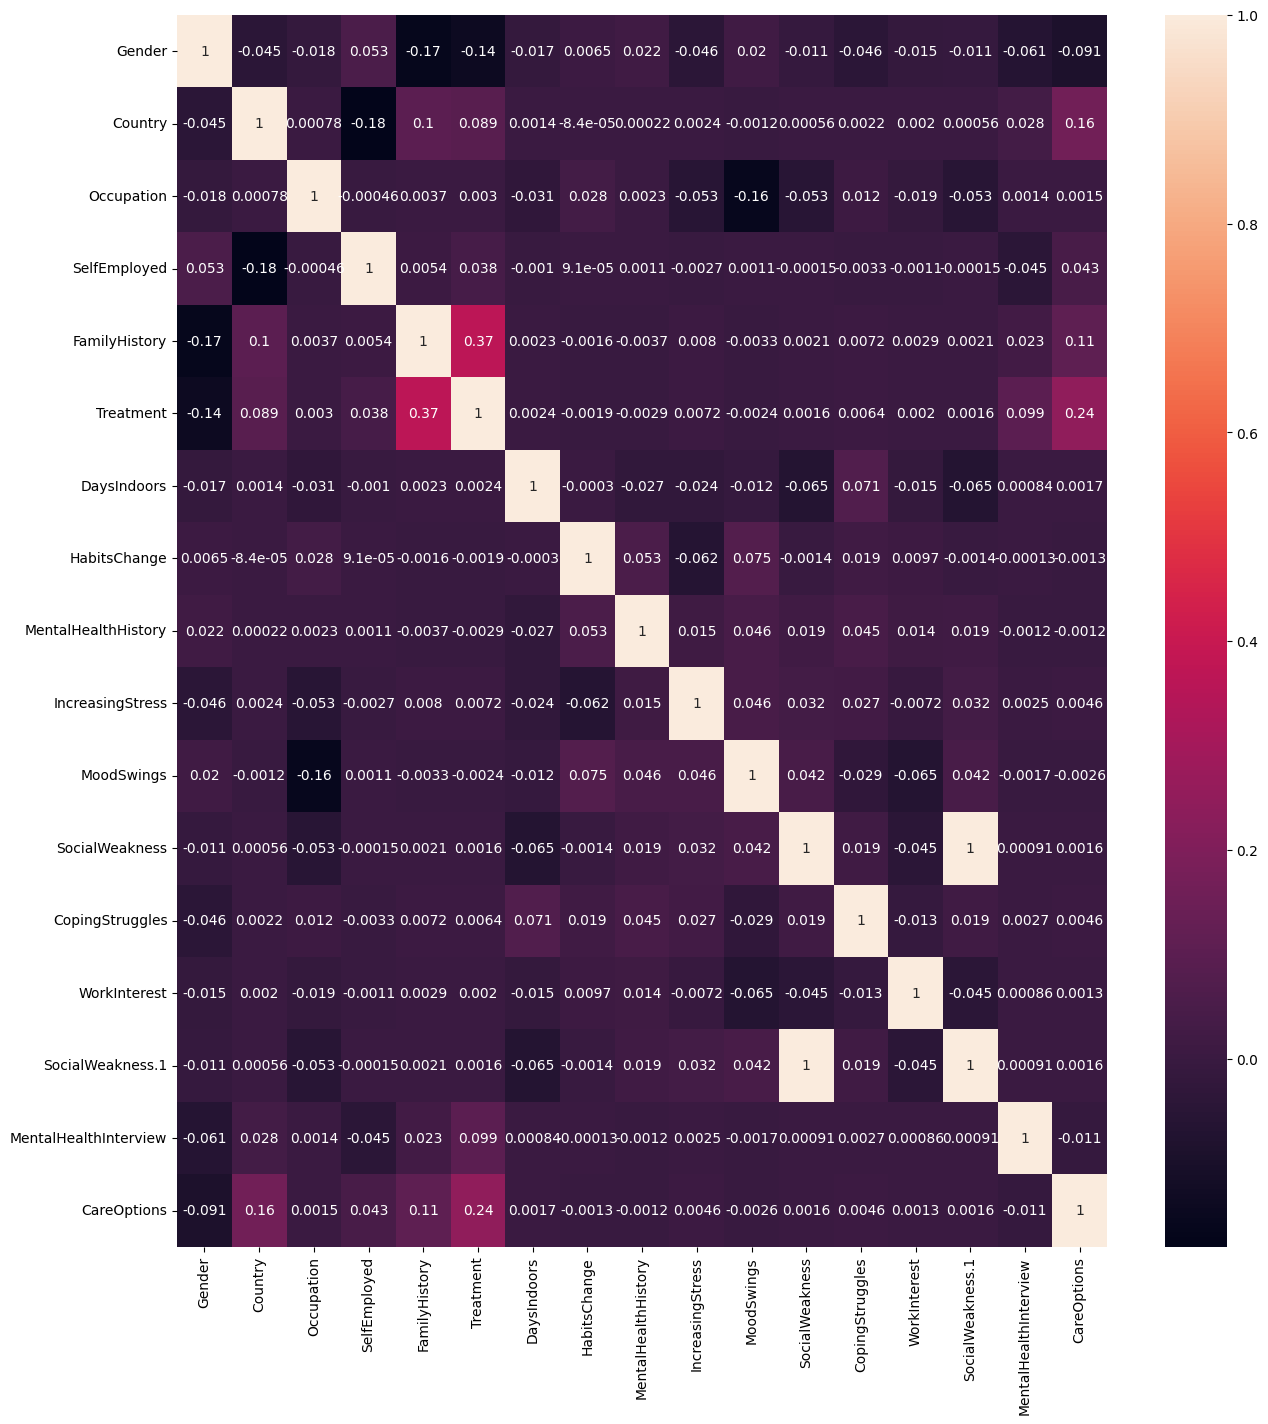

In [ ]:
### Matriz correlación de variables (spearman)
matriz_spearman = data.corr(method='spearman')

### Gráfica de las correlaciones
sb.heatmap(matriz_spearman,
           annot=True)

<Axes: >

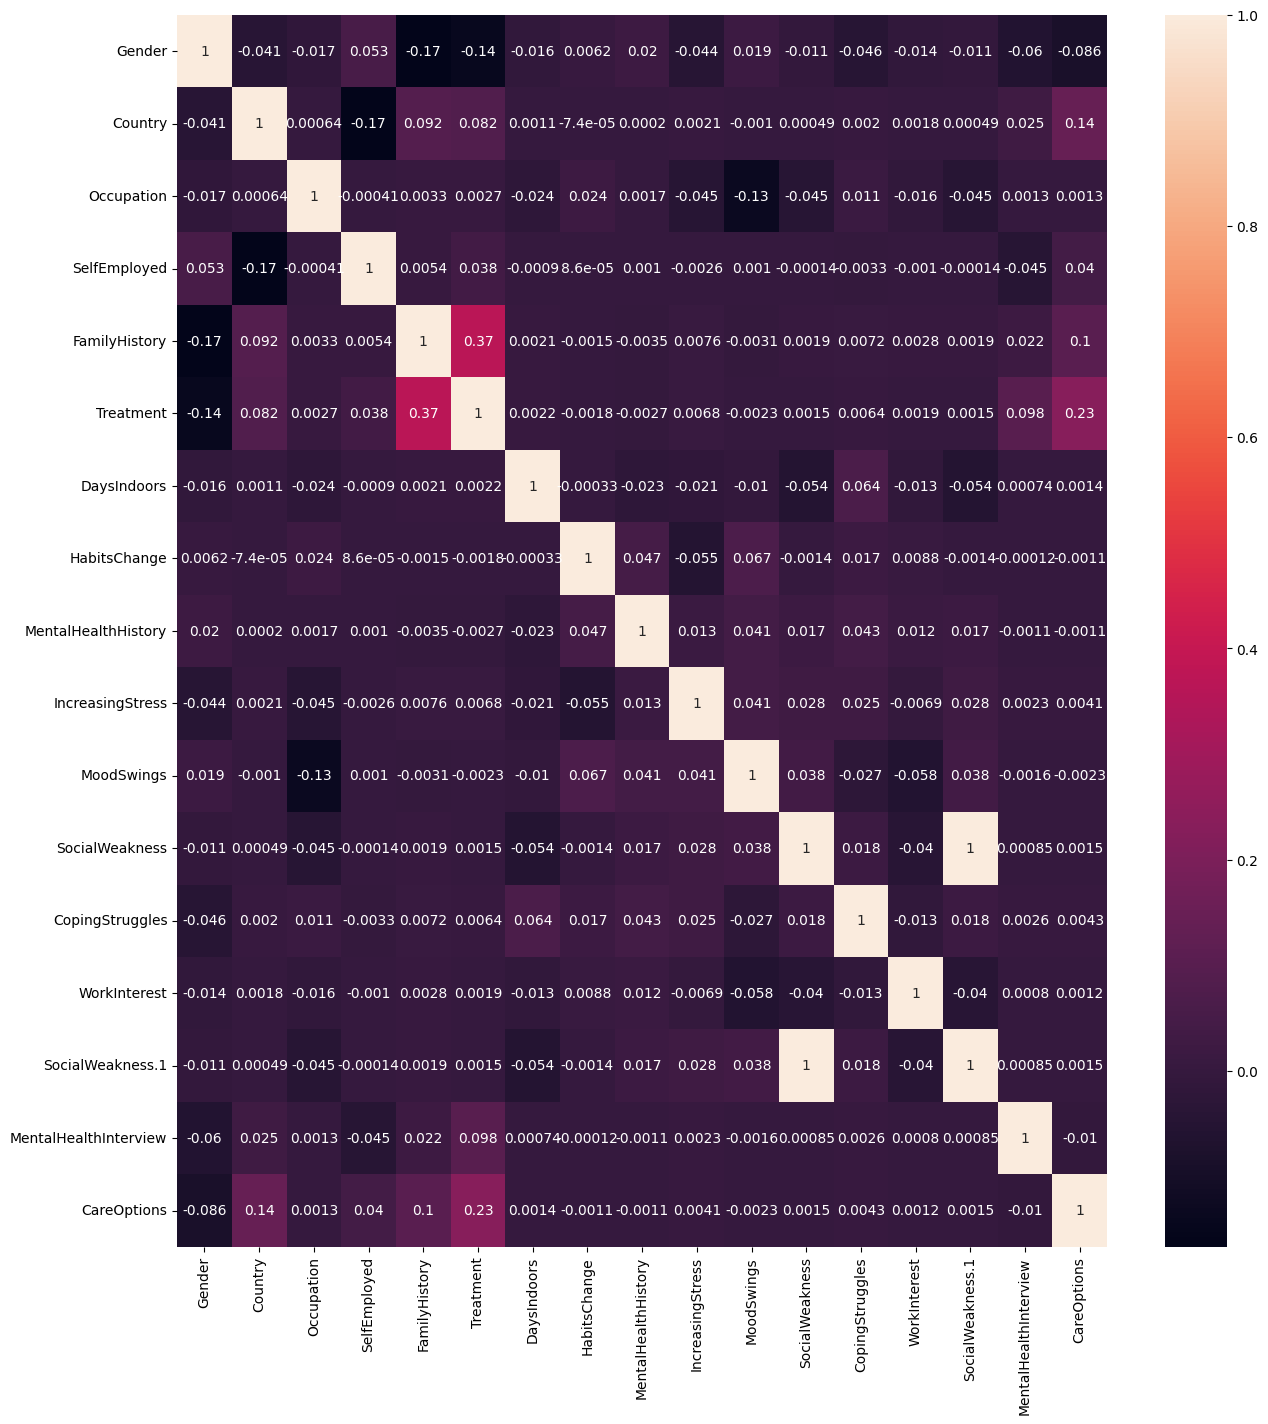

In [ ]:
### Matriz correlación de variables (kendall)
matriz_kendall = data.corr(method='kendall')

### Gráfica de las correlaciones
sb.heatmap(matriz_kendall,
           annot=True)


Se aplicaron los coeficientes de correlación de Pearson, Spearman y Kendall con el fin de analizar las relaciones entre las variables del conjunto de datos.

Pearson mide la relación lineal entre variables numéricas.

Spearman mide la relación monótona (basada en rangos).

Kendall evalúa la concordancia entre pares de observaciones.



###Paso 8 Se separan los datos para entrenamiento y pruebas

In [ ]:
features =['Gender', 'Country', 'Occupation', 'SelfEmployed', 'FamilyHistory',
 'DaysIndoors', 'HabitsChange', 'MentalHealthHistory', 'IncreasingStress',
 'MoodSwings', 'SocialWeakness', 'CopingStruggles', 'WorkInterest',
 'SocialWeakness.1', 'MentalHealthInterview', 'CareOptions']

X = data_balance[features]

# Variable objetivo (etiqueta)
y = data_balance['Treatment']

# Se separa la data 80% entrenamiento y 20% prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 42)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)

Tamaño del set de entrenamiento: (209411, 16)
Tamaño del set de prueba: (52353, 16)


Se realizó la división del conjunto de datos en dos partes:
un 80 % (209 411 registros) destinado al entrenamiento del modelo y un 20 % (52 353 registros) destinado a su validación.

Esta separación permite evaluar la capacidad predictiva del modelo frente a datos no vistos,
garantizando que el aprendizaje obtenido no se limite al conjunto original,
sino que pueda generalizar adecuadamente a nuevos casos.

###Paso 9. Modelo y metricas

In [ ]:
# Se crea el clasificador de tipo Naive Bayes
nb = GaussianNB()

# Se entrena el modelo
nb.fit(X_train, y_train)

# Se genera la predicción
prediccion = nb.predict(X_test)

# Se imprimen las métricas
print(confusion_matrix(y_test, prediccion))
print(classification_report(y_test, prediccion))
print("Precisión:", round(precision_score(y_test, prediccion),2) )
print("Recall:", round(recall_score(y_test, prediccion),2) )
print("F1-Score:", round(f1_score(y_test, prediccion),2) )

[[19511  6626]
 [10415 15801]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70     26137
           1       0.70      0.60      0.65     26216

    accuracy                           0.67     52353
   macro avg       0.68      0.67      0.67     52353
weighted avg       0.68      0.67      0.67     52353

Precisión: 0.7
Recall: 0.6
F1-Score: 0.65


###Paso10.Naive Bayes con hiperparámetros

In [ ]:
# nb con hiperparámetros
nb = GaussianNB()

# Definir la rejilla de hiperparámetros
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Configurar la búsqueda
grid_search = GridSearchCV(estimator = nb,
                           param_grid = param_grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")


# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Usar el mejor modelo
best_nb = grid_search.best_estimator_

# Generar predicciones
pred = best_nb.predict(X_test)

# Evaluar el modelo
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, pred))


print("Precisión:", round(precision_score(y_test, pred),2) )
print("Recall:", round(recall_score(y_test, pred),2) )
print("F1-Score:", round(f1_score(y_test, pred),2) )

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Mejores hiperparámetros encontrados:
{'var_smoothing': 1e-05}

Matriz de confusión:
[[19558  6579]
 [10448 15768]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70     26137
           1       0.71      0.60      0.65     26216

    accuracy                           0.67     52353
   macro avg       0.68      0.67      0.67     52353
weighted avg       0.68      0.67      0.67     52353

Precisión: 0.71
Recall: 0.6
F1-Score: 0.65


###Paso 11.modelo de árbol de decisión

In [ ]:
dt = DecisionTreeClassifier()

# Se entrena el modelo
dt.fit(X_train, y_train)

# Se genera la predicción
predict = dt.predict(X_test)


# Selección de mejores caracteristicas
importances = dt.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar mejor
feature_importances = pd.DataFrame({'Característica': feature_names, 'Importancia': importances})
feature_importances = feature_importances.sort_values('Importancia', ascending=False)

print(feature_importances)

           Característica  Importancia
4           FamilyHistory     0.294843
1                 Country     0.254267
15            CareOptions     0.186452
14  MentalHealthInterview     0.080588
3            SelfEmployed     0.055444
0                  Gender     0.031586
5             DaysIndoors     0.015880
2              Occupation     0.015011
9              MoodSwings     0.010247
7     MentalHealthHistory     0.010040
8        IncreasingStress     0.009819
12           WorkInterest     0.009597
6            HabitsChange     0.009469
11        CopingStruggles     0.006191
10         SocialWeakness     0.005381
13       SocialWeakness.1     0.005184


###Paso 12.Se separan los datos para entrenamiento y pruebas para el arbol de desicion

In [ ]:
features =['Gender', 'Country', 'Occupation', 'SelfEmployed', 'FamilyHistory',
 'DaysIndoors', 'HabitsChange', 'MentalHealthHistory', 'IncreasingStress',
 'MoodSwings', 'SocialWeakness', 'CopingStruggles', 'WorkInterest',
 'SocialWeakness.1', 'MentalHealthInterview', 'CareOptions']

X = data_balance[features]

# Variable objetivo (etiqueta)
y = data_balance['Treatment']

# Se separa la data 80% entrenamiento y 20% prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 42)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)

Tamaño del set de entrenamiento: (209411, 16)
Tamaño del set de prueba: (52353, 16)


Volvimos a definir las variables de entrada y salida porque íbamos a usar un nuevo modelo.
Así garantizamos que tanto el Naive Bayes como el Árbol de Decisión trabajen con exactamente los mismos datos y podamos comparar su rendimiento de forma justa.

###Paso 13.Se genera la predicción sin hiperparámetros

In [ ]:
### Se genera la predicción sin hiperparámetros
# Se selecciona el algoritmo
dt = DecisionTreeClassifier()

# Se entrena el algoritmo
dt.fit(X_train, y_train)

# Se genera la predicción
predict = dt.predict(X_test)

# Se imprimen las métricas
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print("Precisión:", round(precision_score(y_test, predict),2) )
print("Recall:", round(recall_score(y_test, predict),2) )
print("F1-Score:", round(f1_score(y_test, predict),2) )

[[19373  6764]
 [ 6214 20002]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     26137
           1       0.75      0.76      0.76     26216

    accuracy                           0.75     52353
   macro avg       0.75      0.75      0.75     52353
weighted avg       0.75      0.75      0.75     52353

Precisión: 0.75
Recall: 0.76
F1-Score: 0.76


###Paso 14.Hiperparámetros con GridSearch

In [ ]:
### Hiperparámetros con GridSearch
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier()

# Parámetros
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
min_samples_split = [1, 2, 5, 10]


grid = dict(criterion = criterion,
            splitter = splitter,
            min_samples_split = min_samples_split)

grid_search = GridSearchCV(estimator = dt,
                           param_grid = grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
lr = bestModel

# Se entrena el modelo con los mejores parámetros
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Parameters (GridSearch): DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       splitter='random')
-----------------------------------------------------------
[[19425  6712]
 [ 6011 20205]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     26137
           1       0.75      0.77      0.76     26216

    accuracy                           0.76     52353
   macro avg       0.76      0.76      0.76     52353
weighted avg       0.76      0.76      0.76     52353

Precisión:  0.76
Recall:  0.76
F1-Score:  0.76


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###Paso 15.Se crea el Support Vector Machine

In [ ]:
# se crea el modelo
svc = SVC()

# Se entrena el algoritmo
svc.fit(X_train, y_train)

# Se genera la predicción
predict = svc.predict(X_test)

# Se imprimen las métricas
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print("Precisión:", precision_score(y_test, predict))
print("Recall:", recall_score(y_test, predict))
print("F1-Score:", f1_score(y_test, predict))

[[18193  7944]
 [ 5935 20281]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     26137
           1       0.72      0.77      0.75     26216

    accuracy                           0.73     52353
   macro avg       0.74      0.73      0.73     52353
weighted avg       0.74      0.73      0.73     52353

Precisión: 0.718547387068202
Recall: 0.7736115349404944
F1-Score: 0.7450634631986922
